In [28]:
import numpy as np
import scipy.integrate as sci
import matplotlib.pyplot as plt

Cuestión 1. Fijando los valores de los parámetros a los de la cosmología estándar: h=0.67, $\omega_b$=0.022, $\omega_m$=0.14, $n_s=0.97$. Calcular $R(z_{dec})$, $c_s$ y $d_A^c(z_{dec})$. Representar gráficamente $l(l+1)C_l/2\pi$ para $l\in[100,1500]$

In [29]:
#Valores de los parámetros de la cosmología estandar

h = 0.67
omega_b = 0.022
omega_m = 0.14
omega_r = 4.17*10**(-5)
omega_lambda = h**2 - omega_m - omega_r
n_s = 0.97
z_dec = 1090
H_0 = 2998**(-1)*h
A_s = 2.20*10**(-9)
k_0 = 0.05
k_eq = 0.073*omega_m
k_D = 0.14

In [30]:
def R(z):
    
    return 3.04*10**4/(1+z)*omega_b

In [31]:
#R en el desacoplo

print('R(z_dec) = {:.2f}'.format(R(z_dec)))

R(z_dec) = 0.61


In [32]:
def c_s(z):
    
    return np.sqrt(1/3*1/(1+R(z)))

In [33]:
#La velocidad del sonido en el momento del desacoplo

print('c_s(z_dec) = {:.2f}'.format(c_s(z_dec)))

c_s(z_dec) = 0.45


In [34]:
def E(z):
    
    return h**(-1)*np.sqrt(omega_m*(1+z)**3 + omega_r*(1+z)**4 + omega_lambda)

In [35]:
# Distancia angular comóvil en el momento del desacoplo

def d_a_com(z):
    
    return H_0**(-1)*sci.quad(lambda z: 1/E(z),0,z)[0]

In [36]:
print('La distancia angular comóvil es d_a_com = {:.2f}'.format(d_a_com(z_dec)))

La distancia angular comóvil es d_a_com = 14002.41


In [37]:
#Expresiones previas: espectro de potencias de curvatura, función de transferencia, horizonte de sonido, funciones 
#esféricas de Bessel

In [38]:
def P_R(k):
    
    return A_s*(k/k_0)**(n_s-1)

In [39]:
def T(x):
    
    return np.log(1+0.171*x)/(0.171*x)*(1+0.284*x + (1.18*x)**2 + (0.399*x)**3 + (0.450*x)**4)**(-0.25)

In [40]:
def r_s(z):
    
    def frac(z):
        
        return c_s(z)/E(z)
    
    return H_0**(-1)*sci.quad(lambda z: frac(z),z, np.infty)[0]

In [41]:
print('El horizonte de sonido en el momento del desacoplo r_s(z_dec)={:.2f} Mpc'.format(r_s(z_dec)))

El horizonte de sonido en el momento del desacoplo r_s(z_dec)=145.35 Mpc


def j_l2(x,l):
    
    if (x > l):
        
        return 1/2*1/(x*np.sqrt(x**2-l**2))
    
    else:
        
        return 0

In [42]:
def j_l2(x,l):
    
    return 1/(2*x*np.sqrt(x**2 - l**2))

In [43]:
#Expresión del espectro angular de potencias Cl's

def C_l(l):
    
    def INTEGRANDO(k,l):
        
        return P_R(k)*(-R(z_dec)*T(k/k_eq) + 5/3*np.cos(k*r_s(z_dec))*np.exp(-k**2/k_D**2))**2*j_l2(k*d_a_com(z_dec),l)*(1/k)
    
    return 4*np.pi*9/25*sci.quad(lambda k: INTEGRANDO(k,l),l/d_a_com(z_dec), 4000/d_a_com(z_dec))[0]

In [44]:
fluctuaciones = []
multipolos = []

for l in np.arange(100,1500,1):
    
    multipolos = np.append(multipolos,l)
    fluctuaciones = np.append(fluctuaciones, l*(l+1)*C_l(l)/(2*np.pi))

Text(0,0.5,'$l \\cdot (l+1)\\cdot C_l /(2 \\pi)$')

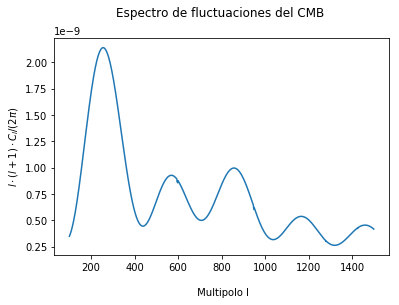

In [53]:
plt.title('Espectro de fluctuaciones del CMB \n')

plt.plot(multipolos, fluctuaciones)

plt.xlabel('\n Multipolo l')
plt.ylabel('$l \cdot (l+1)\cdot C_l /(2 \pi)$')

Cuestión 2. Estudiar la dependencia del espectro en los parámetros R($z_{dec}$), $r_s$ y $d_A^c(z_{dec})$, variando cada una de ellas independientemente.

In [83]:
#Definimos la función para el cálculo de Cl de forma que introduzcamos manualmente las funciones que queremos 
#estudiar su variabilidad

def C_l_VARIABLE(l):
    
    def INTEGRANDO_VARIABLE(k,l):
        
        return P_R(k)*(-R_var*T(k/k_eq) + 5/3*np.cos(k*r_s_var)*np.exp(-k**2/k_D**2))**2*j_l2(k*d_a_com_var,l)*(1/k)
    
    return 4*np.pi*9/25*sci.quad(lambda k: INTEGRANDO_VARIABLE(k,l),l/d_a_com_var, 4000/d_a_com_var)[0]

In [84]:
h = 0.67
omega_b = 0.022
omega_m = 0.14
omega_r = 4.17*10**(-5)
omega_lambda = h**2 - omega_m - omega_r
n_s = 0.97
z_dec = 1090
H_0 = 2998**(-1)*h
A_s = 2.20*10**(-9)
n_s = 0.97
k_0 = 0.05
k_eq = 0.073*omega_m
k_D = 0.14

In [122]:
#Variación del espectro si variamos R

r_s_var = r_s(z_dec)
d_a_com_var = d_a_com(z_dec)

fluctuaciones_R02 = []
fluctuaciones_R06 = []
fluctuaciones_R10 = []

multipolos = np.arange(100,1501,1)

for R_var in [0.2 , 0.6, 1.0]:
    
    for l in multipolos:
        
        if R_var == 0.2 :
            
            #print(l,l*(l+1)*C_l_VARIABLE(l)/(2*np.pi))
            fluctuaciones_R02 = np.append(fluctuaciones_R02, l*(l+1)*C_l_VARIABLE(l)/(2*np.pi))
            
        if R_var == 0.6 :
            
            fluctuaciones_R06 = np.append(fluctuaciones_R06, l*(l+1)*C_l_VARIABLE(l)/(2*np.pi))
            
        if R_var == 1.0 : 
                        
            fluctuaciones_R10 = np.append(fluctuaciones_R10, l*(l+1)*C_l_VARIABLE(l)/(2*np.pi))


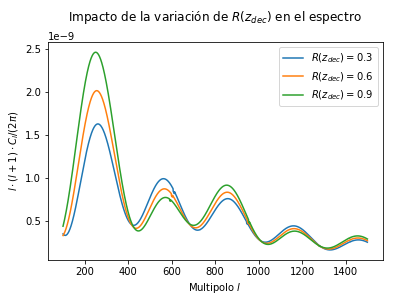

In [123]:
plt.figure()

plt.plot(multipolos, fluctuaciones_R02,label='$R(z_{dec}) = 0.3$')
plt.plot(multipolos, fluctuaciones_R06,label='$R(z_{dec}) = 0.6$')
plt.plot(multipolos, fluctuaciones_R10,label='$R(z_{dec}) = 0.9$')

plt.title('Impacto de la variación de $R(z_{dec})$ en el espectro \n')
plt.xlabel('Multipolo $l$')
plt.ylabel('$l \cdot (l+1)\cdot C_l /(2 \pi)$')

plt.legend()

In [127]:
#Variación del espectro si variamos r_s

R_var = R(z_dec)
d_a_com_var = d_a_com(z_dec)

fluctuaciones_r_s_100 = []
fluctuaciones_r_s_150 = []
fluctuaciones_r_s_200 = []

multipolos = np.arange(100,1501,1)

for r_s_var in [100,150,200]:
    
    for l in multipolos:
        
        
        if r_s_var == 100:
            
            fluctuaciones_r_s_100 = np.append(fluctuaciones_r_s_100, l*(l+1)*C_l_VARIABLE(l)/(2*np.pi))
        
        if r_s_var == 150:
            
            fluctuaciones_r_s_150 = np.append(fluctuaciones_r_s_150, l*(l+1)*C_l_VARIABLE(l)/(2*np.pi))

        if r_s_var == 200:
            
            fluctuaciones_r_s_200 = np.append(fluctuaciones_r_s_200, l*(l+1)*C_l_VARIABLE(l)/(2*np.pi))

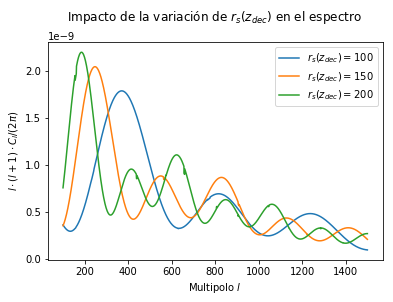

In [128]:
plt.figure()

plt.plot(multipolos, fluctuaciones_r_s_100,label='$r_s(z_{dec}) = 100$')
plt.plot(multipolos, fluctuaciones_r_s_150,label='$r_s(z_{dec}) = 150$')
plt.plot(multipolos, fluctuaciones_r_s_200,label='$r_s(z_{dec}) = 200$')

plt.title('Impacto de la variación de $r_s(z_{dec})$ en el espectro \n')
plt.xlabel('Multipolo $l$')
plt.ylabel('$l \cdot (l+1)\cdot C_l /(2 \pi)$')

plt.legend()

In [129]:
#Variación del espectro si variamos d_a_com

r_s_var = r_s(z_dec)
R_var = R(z_dec)

fluctuaciones_d10000 = []
fluctuaciones_d15000 = []
fluctuaciones_d20000 = []

multipolos = np.arange(100,1501,1)

for d_a_com_var in [10000,15000,20000]:
    
    for l in multipolos:
        
        if d_a_com_var == 10000:
            
            fluctuaciones_d10000 = np.append(fluctuaciones_d10000,l*(l+1)*C_l_VARIABLE(l)/(2*np.pi))
            
        if d_a_com_var == 15000:
            
            fluctuaciones_d15000 = np.append(fluctuaciones_d15000,l*(l+1)*C_l_VARIABLE(l)/(2*np.pi))
            
        if d_a_com_var == 20000:
            
            fluctuaciones_d20000 = np.append(fluctuaciones_d20000,l*(l+1)*C_l_VARIABLE(l)/(2*np.pi))

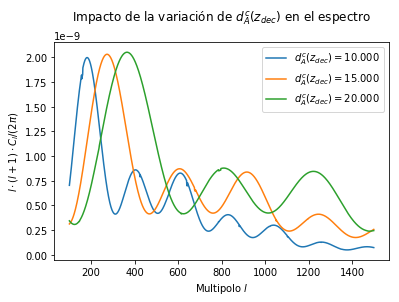

In [130]:
plt.figure()

plt.plot(multipolos, fluctuaciones_d10000,label='$d_A^c(z_{dec}) = 10.000$')
plt.plot(multipolos, fluctuaciones_d15000,label='$d_A^c(z_{dec}) = 15.000$')
plt.plot(multipolos, fluctuaciones_d20000,label='$d_A^c(z_{dec}) = 20.000$')

plt.title('Impacto de la variación de $d_A^c(z_{dec})$ en el espectro \n')
plt.xlabel('Multipolo $l$')
plt.ylabel('$l \cdot (l+1)\cdot C_l /(2 \pi)$')

plt.legend()

Cuestión 3. Estudiar la dependencia del espectro con $h$. Considerar, aparte de valor estándar $h=0.5$ y $h=0.8$ con el resto de los parámetros fijos. Comprobar que el valor de $h$ no afecta a la altura de los picos pero sí a su posición. Explicar este efecto en términos de lo visto en la cuestión 2.

In [131]:
h = 0.67
omega_b = 0.022
omega_m = 0.14
omega_r = 4.17*10**(-5)
omega_lambda = h**2 - omega_m - omega_r
n_s = 0.97
z_dec = 1090
H_0 = 2998**(-1)*h
A_s = 2.20*10**(-9)
n_s = 0.97
k_0 = 0.05
k_eq = 0.073*omega_m
k_D = 0.14

In [161]:
fluctuaciones_h05 = []
fluctuaciones_h067 = []
fluctuaciones_h08 = []

for h in [0.5, 0.67, 0.8]:
    
    H_0 = 2998**(-1)*h
    
    for l in multipolos:
        
        if (h == 0.5):
            
            fluctuaciones_h05 = np.append(fluctuaciones_h05, l*(l+1)*C_l(l)/(2*np.pi))
            
        if (h == 0.67):
            
            fluctuaciones_h067 = np.append(fluctuaciones_h067, l*(l+1)*C_l(l)/(2*np.pi))
            
        if (h == 0.8):
            
            fluctuaciones_h08 = np.append(fluctuaciones_h08, l*(l+1)*C_l(l)/(2*np.pi))

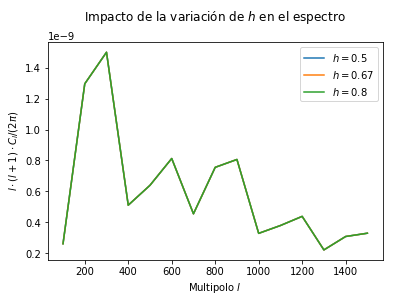

In [162]:
plt.figure()

plt.plot(multipolos, fluctuaciones_h05,label='$h=0.5$')
plt.plot(multipolos, fluctuaciones_h067,label='$h=0.67$')
plt.plot(multipolos, fluctuaciones_h08,label='$h=0.8$')

plt.title('Impacto de la variación de $h$ en el espectro \n')
plt.xlabel('Multipolo $l$')
plt.ylabel('$l \cdot (l+1)\cdot C_l /(2 \pi)$')

plt.legend()

Cuestión 4. Estudiar la dependencia del espectro con $\omega_b$. Considerar, aparte del valor estándar, $\omega_b=0.01$ y $\omega_b = 0.04$ con el resto de los parámetros fijos. Comprobar que aumentar $\omega_b$ incrementa los picos impares y disminuye los pares. Explicar este efecto en términos de los visto en la cuestión 2.

In [134]:
h = 0.67
omega_b = 0.022
omega_m = 0.14
omega_r = 4.17*10**(-5)
omega_lambda = h**2 - omega_m - omega_r
n_s = 0.97
z_dec = 1090
H_0 = 2998**(-1)*h
A_s = 2.20*10**(-9)
n_s = 0.97
k_0 = 0.05
k_eq = 0.073*omega_m
k_D = 0.14

In [140]:
fluctuaciones_o001 = []
fluctuaciones_o0022 = []
fluctuaciones_o004 = []

multipolos = np.arange(100, 1500,1)

for omega_b in np.array([0.01, 0.022, 0.04]):
    
    for l in multipolos:
    
        if (omega_b == 0.01):
        
            fluctuaciones_o001 = np.append(fluctuaciones_o001, l*(l+1)*C_l(l)/(2*np.pi))    
            
        if (omega_b == 0.022):
            
            fluctuaciones_o0022 = np.append(fluctuaciones_o0022, l*(l+1)*C_l(l)/(2*np.pi))    

        if (omega_b == 0.04):
            
            fluctuaciones_o004 = np.append(fluctuaciones_o004, l*(l+1)*C_l(l)/(2*np.pi))    

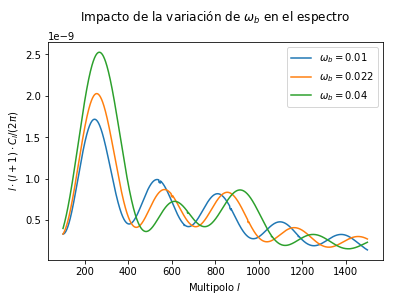

In [141]:
plt.figure()

plt.plot(multipolos, fluctuaciones_o001,label='$\omega_b = 0.01$')
plt.plot(multipolos, fluctuaciones_o0022,label='$\omega_b = 0.022$')
plt.plot(multipolos, fluctuaciones_o004,label='$\omega_b = 0.04$')

plt.title('Impacto de la variación de $\omega_b$ en el espectro \n')
plt.xlabel('Multipolo $l$')
plt.ylabel('$l \cdot (l+1)\cdot C_l /(2 \pi)$')

plt.legend()

Cuestión 5. Estudiar la dependencia del espectro con $n_s$. Considerar, aparte del valor estándar, $n_s=0.7$ y $n_s=1.2$ con el resto de los parámetros fijos. Determinar el multipolo $l$ correspondiente a la escala del pivote $k_0$ y explicar el efecto.

In [143]:
h = 0.67
omega_b = 0.022
omega_m = 0.14
omega_r = 4.17*10**(-5)
omega_lambda = h**2 - omega_m - omega_r
n_s = 0.97
z_dec = 1090
H_0 = 2998**(-1)*h
A_s = 2.20*10**(-9)
n_s = 0.97
k_0 = 0.05
k_eq = 0.073*omega_m
k_D = 0.14

In [145]:
fluctuaciones_ns07 = []
fluctuaciones_ns097 = []
fluctuaciones_ns12 = []

multipolos = np.arange(100, 1500,1)

for n_s in np.array([0.7, 0.97, 1.2]):
    
    for l in multipolos:
        
        if (n_s == 0.7):
        
            fluctuaciones_ns07 = np.append(fluctuaciones_ns07, l*(l+1)*C_l(l)/(2*np.pi))
            
        if (n_s == 0.97):
            
            fluctuaciones_ns097 = np.append(fluctuaciones_ns097, l*(l+1)*C_l(l)/(2*np.pi))
            
        if (n_s == 1.2):
            
            fluctuaciones_ns12= np.append(fluctuaciones_ns12, l*(l+1)*C_l(l)/(2*np.pi))

In [3]:
plt.figure()

plt.plot(multipolos,fluctuaciones_ns07 ,label='$n_s = 0.70$')
plt.plot(multipolos,fluctuaciones_ns097 ,label='$n_s = 0.97$')
plt.plot(multipolos, fluctuaciones_ns12,label='$n_s = 1.20$')

plt.title('Impacto de la variación de $n_s$ en el espectro \n')
plt.xlabel('Multipolo $l$')
plt.ylabel('$l \cdot (l+1)\cdot C_l /(2 \pi)$')

plt.legend()

NameError: name 'multipolos' is not defined

<Figure size 432x288 with 0 Axes>